# **Data Mining - Class Assignment W06 (Random Forest & XGBoost)**

### Jefferson Wesley Liunardi / 0706022310046
### Andrew Hendrawan / 07060223100

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

## **Load Dataset**

In [2]:
# Display all columns
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Bank%20(1).csv", delimiter=";")

# Clean up column names by removing any leading/trailing spaces
df.columns = df.columns.str.strip()

In [3]:
# Display the first 5 rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
# Get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
# Get statistical info from dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


## **Preprocessing Data**

In [6]:
# Show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'age': array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
        26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
        51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
        62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84]),
 'job': array(['unemployed', 'services', 'management', 'blue-collar',
        'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
        'housemaid', 'retired', 'unknown'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'balance': array([ 1787,  4789,  1350, ...,  -333, -3313,  1137], shape=(2353,)),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'unknown', 'telephone'], dtype=object),
 'day': array([19, 11, 16,  3,  5, 23, 

In [7]:
# Count unique values per column
unique_count = df.nunique().sort_values(ascending=False)
print("Number of unique values per column:\n")
print(unique_count)

Number of unique values per column:

balance      2353
duration      875
pdays         292
age            67
campaign       32
day            31
previous       24
month          12
job            12
poutcome        4
education       4
marital         3
contact         3
loan            2
housing         2
default         2
y               2
dtype: int64


In [8]:
# Check  missing value for each column
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
# Check the columns to verify correct formatting
print("DataFrame Columns:")
print(df.columns)

DataFrame Columns:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


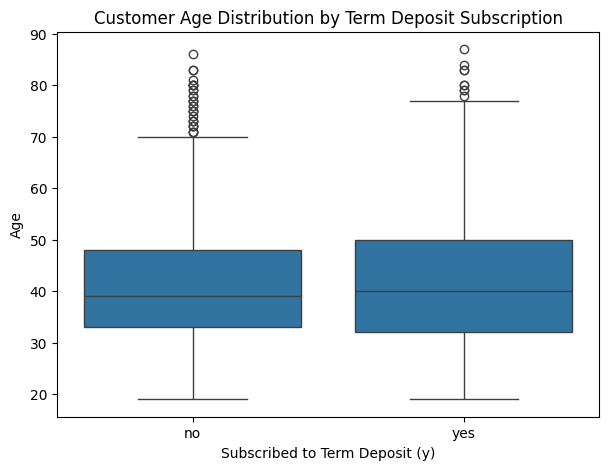

In [10]:
# Create the boxplot
plt.figure(figsize=(7, 5)) # Optional: Adjust figure size for clarity
sns.boxplot(x='y', y='age', data=df)
plt.title('Customer Age Distribution by Term Deposit Subscription')
plt.xlabel('Subscribed to Term Deposit (y)')
plt.ylabel('Age')
plt.show()

The boxplot shows the age distribution of customers based on whether they subscribed or did not subscribe to a term deposit. Both groups have a similar median age of around 39 to 40 years, and most customers fall within the same range of 30 to 50 years old, indicating that age alone is not a major factor distinguishing subscribers from non-subscribers. However, the distribution for those who subscribed appears slightly higher, suggesting that older customers may be somewhat more likely to subscribe. There are also a few outliers above 70 years in both groups, showing that some elderly customers participate in the campaign. Overall, while the difference between the two groups is not significant, there is a mild trend indicating that older and middle-aged customers are more inclined to subscribe, implying that the bank could focus its marketing efforts on customers aged 35 to 55 and design targeted offers for older clients who are more likely to invest in long-term financial products like term deposits.

## **Feature Encoding**

In [11]:
# Remove unwanted whitespace from column headers
df.columns = df.columns.str.strip()

# Confirm cleaned column names
print(df.columns)

# Binary Encoding for yes/no and contact type columns
binary_map = {
    'default': {'no': 0, 'yes': 1},
    'housing': {'no': 0, 'yes': 1},
    'loan': {'no': 0, 'yes': 1},
    'contact': {'cellular': 0, 'telephone': 1},
    'y': {'no': 0, 'yes': 1}
}

df_encoded = df.copy()
for feature, values in binary_map.items():
    df_encoded[feature] = df_encoded[feature].map(values)

# Apply Ordinal Encoding to other categorical attributes
from sklearn.preprocessing import OrdinalEncoder
categorical_features = ['job', 'marital', 'education', 'month', 'poutcome']

encoder = OrdinalEncoder()
df_encoded[categorical_features] = encoder.fit_transform(df_encoded[categorical_features])

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [12]:
# Create a dictionary showing category-value relationships
encode_dict = {
    feature: {category: int(idx) for idx, category in enumerate(categories)}
    for feature, categories in zip(categorical_features, encoder.categories_)
}

import pprint
pprint.pprint(encode_dict)

# Display a few rows of the transformed dataset
print(df_encoded.sample(5))

{'education': {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3},
 'job': {'admin.': 0,
         'blue-collar': 1,
         'entrepreneur': 2,
         'housemaid': 3,
         'management': 4,
         'retired': 5,
         'self-employed': 6,
         'services': 7,
         'student': 8,
         'technician': 9,
         'unemployed': 10,
         'unknown': 11},
 'marital': {'divorced': 0, 'married': 1, 'single': 2},
 'month': {'apr': 0,
           'aug': 1,
           'dec': 2,
           'feb': 3,
           'jan': 4,
           'jul': 5,
           'jun': 6,
           'mar': 7,
           'may': 8,
           'nov': 9,
           'oct': 10,
           'sep': 11},
 'poutcome': {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}}
      age  job  marital  education  default  balance  housing  loan  contact  \
803    57  3.0      2.0        1.0        0      254        0     0      0.0   
2393   41  2.0      1.0        1.0        0     2105        1     0      0.0   


In [13]:
# Check the original row (before encoding)
print("Original Data (before encoding):")
display(df.loc[30])

# Check the same row after encoding
print("Encoded Data (after encoding):")
display(df_encoded.loc[30])

Original Data (before encoding):


age                 68
job            retired
marital       divorced
education    secondary
default             no
balance           4189
housing             no
loan                no
contact      telephone
day                 14
month              jul
duration           897
campaign             2
pdays               -1
previous             0
poutcome       unknown
y                  yes
Name: 30, dtype: object

Encoded Data (after encoding):


age            68.0
job             5.0
marital         0.0
education       1.0
default         0.0
balance      4189.0
housing         0.0
loan            0.0
contact         1.0
day            14.0
month           5.0
duration      897.0
campaign        2.0
pdays          -1.0
previous        0.0
poutcome        3.0
y               1.0
Name: 30, dtype: float64

## **Separate features and target (Define the features (X) and the target variable (y))**

In [14]:
# Split the dataset into input features (X) and target variable (y)
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [15]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10.0,1.0,0.0,0,1787,0,0,0.0,19,10.0,79,1,-1,0,3.0
1,33,7.0,1.0,1.0,0,4789,1,1,0.0,11,8.0,220,1,339,4,0.0
2,35,4.0,2.0,2.0,0,1350,1,0,0.0,16,0.0,185,1,330,1,0.0
3,30,4.0,1.0,2.0,0,1476,1,1,NaN,3,6.0,199,4,-1,0,3.0
4,59,1.0,1.0,1.0,0,0,1,0,NaN,5,8.0,226,1,-1,0,3.0


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

## **Split the data into training set and test set**

In [17]:
# Divide the dataset into training and testing portions
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # reserve 20% of the data for testing
    random_state=0,      # keep split consistent each run
    shuffle=True         # shuffle data before splitting
)

In [18]:
# Display dataset dimensions after splitting (X_train and X_test)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (3616, 16)
X_test shape: (905, 16)


In [19]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4383,26,0.0,2.0,1.0,0,609,0,0,1.0,28,4.0,112,1,-1,0,3.0
502,31,4.0,1.0,2.0,0,13,0,0,0.0,28,1.0,110,5,-1,0,3.0
4052,52,10.0,1.0,0.0,0,20,1,0,1.0,28,4.0,172,1,-1,0,3.0
3634,54,5.0,1.0,1.0,0,153,1,1,NaN,26,8.0,74,1,-1,0,3.0
3088,31,9.0,2.0,1.0,0,2544,0,0,0.0,15,5.0,252,1,184,3,2.0


In [20]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4274,35,1.0,1.0,0.0,0,378,1,0,NaN,16,8.0,427,3,-1,0,3.0
72,31,4.0,2.0,2.0,0,6248,1,0,NaN,9,8.0,154,2,-1,0,3.0
1065,30,10.0,1.0,2.0,0,0,1,0,0.0,18,9.0,756,1,-1,0,3.0
3185,42,0.0,1.0,1.0,0,529,1,1,0.0,19,9.0,193,3,-1,0,3.0
130,41,1.0,1.0,0.0,0,168,1,0,0.0,18,9.0,187,3,-1,0,3.0


In [21]:
# Display dataset dimensions after splitting (y_train and y_test)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (3616,)
y_test shape: (905,)


In [22]:
y_train.head()

4383    0
502     0
4052    0
3634    0
3088    1
Name: y, dtype: int64

In [23]:
y_test.head()

4274    0
72      0
1065    0
3185    0
130     0
Name: y, dtype: int64

# **Decision Tree Classifier**

In [24]:
# Train a Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)

# Predict on training and test sets
train_pred = decision_tree.predict(X_train)
test_pred = decision_tree.predict(X_test)

# Print classification reports
print("\n=== Model Evaluation: Training Data ===")
print(classification_report(y_train, train_pred, digits=4))

print("\n=== Model Evaluation: Test Data ===")
print(classification_report(y_test, test_pred, digits=4))


=== Model Evaluation: Training Data ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3207
           1     1.0000    1.0000    1.0000       409

    accuracy                         1.0000      3616
   macro avg     1.0000    1.0000    1.0000      3616
weighted avg     1.0000    1.0000    1.0000      3616


=== Model Evaluation: Test Data ===
              precision    recall  f1-score   support

           0     0.9120    0.9281    0.9200       793
           1     0.4184    0.3661    0.3905       112

    accuracy                         0.8586       905
   macro avg     0.6652    0.6471    0.6552       905
weighted avg     0.8509    0.8586    0.8545       905



In [25]:
# Calculate and print F1 scores
from sklearn.metrics import f1_score

f1_train = f1_score(y_train, train_pred)
f1_test = f1_score(y_test, test_pred)

# Display summary of F1 scores
print(f"Training F1 Score : {f1_train:.3f}")
print(f"Testing F1 Score : {f1_test:.3f}")

# Summary metrics
if f1_train - f1_test > 0.1:
    print("\nModel might be slightly overfitting the training data.")
else:
    print("\nModel generalizes well across datasets.")

# Confusion Matrix for more insight
print("\nConfusion Matrix (Test Data)")
print(confusion_matrix(y_test, test_pred))

Training F1 Score : 1.000
Testing F1 Score : 0.390

Model might be slightly overfitting the training data.

Confusion Matrix (Test Data)
[[736  57]
 [ 71  41]]


The Decision Tree model demonstrates clear signs of overfitting based on its evaluation results. On the training data, the model achieves a perfect score across all metrics—100% precision, recall, and F1-score indicating that it has memorized the training dataset completely. However, when tested on unseen data, performance drops noticeably, with an accuracy of 85.86%. The precision (0.9120) and recall (0.9281) for class 0 (non-subscribers) remain high, showing that the model effectively identifies customers who are unlikely to subscribe. In contrast, the precision (0.4184), recall (0.3661), and F1-score (0.3905) for class 1 (subscribers) are significantly lower, suggesting poor generalization in predicting customers who will subscribe. This imbalance implies that the model is biased toward the majority class, a common issue when class distributions are uneven. The perfect training results alongside weaker test performance confirm that the Decision Tree overfits the training data, making it less reliable for real-world predictions. To improve its generalization, techniques such as pruning, limiting tree depth, or switching to ensemble methods like Random Forest or Gradient Boosting could be applied to create a more balanced and robust model.

## **Hyperparameter Tuning use Grid**

In [26]:
from sklearn.model_selection import GridSearchCV

# Set up hyperparameter grid for optimization
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1, 11)),
    'random_state': [0, 41, 42]
}

# Initialize Decision Tree model
dtree_clf = DecisionTreeClassifier()

# Perform grid search using F1 score as the evaluation metric
grid_search = GridSearchCV(
    estimator=dtree_clf,
    param_grid=param_grid,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# Retrieve best model and evaluate
best_dtree_clf = grid_search.best_estimator_
y_pred_test = best_dtree_clf.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation F1 Score: {:.3f}".format(grid_search.best_score_))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'random_state': 42}
Best Cross-Validation F1 Score: 0.420


In [27]:
# Extract best hyperparameters and rebuild the Decision Tree model
best_settings = grid_search.best_params_

refined_tree = DecisionTreeClassifier(**best_settings)
refined_tree.fit(X_train, y_train)

# Generate predictions for training and test datasets
train_predictions = refined_tree.predict(X_train)
test_predictions = refined_tree.predict(X_test)

# Import metrics and display reports
from sklearn.metrics import classification_report

print("\n=== Performance Summary: Training Set ===")
print(classification_report(y_train, train_predictions, digits=4))

print("\n=== Performance Summary: Test Set ===")
print(classification_report(y_test, test_predictions, digits=4))

# Tambahkan sedikit variasi informasi tambahan
train_accuracy = refined_tree.score(X_train, y_train)
test_accuracy = refined_tree.score(X_test, y_test)

print(f"\nModel Accuracy -> Train: {train_accuracy:.3f} | Test: {test_accuracy:.3f}")



=== Performance Summary: Training Set ===
              precision    recall  f1-score   support

           0     0.9623    0.9953    0.9785      3207
           1     0.9498    0.6944    0.8023       409

    accuracy                         0.9613      3616
   macro avg     0.9561    0.8448    0.8904      3616
weighted avg     0.9609    0.9613    0.9586      3616


=== Performance Summary: Test Set ===
              precision    recall  f1-score   support

           0     0.9188    0.9559    0.9370       793
           1     0.5625    0.4018    0.4688       112

    accuracy                         0.8873       905
   macro avg     0.7406    0.6788    0.7029       905
weighted avg     0.8747    0.8873    0.8790       905


Model Accuracy -> Train: 0.961 | Test: 0.887


The Decision Tree using Hyperparameter Tuning use Grid shows that the model performs very well on the training set with an overall accuracy of 96.1%, but its performance slightly decreases on the test set with an accuracy of 88.7%. This drop indicates mild overfitting, where the model fits the training data slightly too well and generalizes less effectively to unseen data. For the training set, the model achieves high precision and recall for both classes, especially for class 0 (non-subscribers), which dominates the dataset. On the test set, class 0 still maintains high precision (0.9188) and recall (0.9559), meaning the model is very effective at correctly identifying customers who will not subscribe. However, for class 1 (subscribers), precision (0.5625), recall (0.4018), and F1-score (0.4688) are notably lower, showing the model struggles to detect positive cases accurately. This imbalance suggests the model is biased toward predicting non-subscribers, likely due to class imbalance in the data. Despite this, the overall test performance remains strong, with a weighted F1-score of 0.879, indicating the model is reliable for predicting the majority class but could benefit from further tuning or resampling techniques to improve detection of actual subscribers.

## **KFold Cross Validation**

In [28]:
from sklearn.model_selection import KFold, cross_val_score

# Initialize 5-fold cross-validation with shuffling
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_num = 1

# Generate indices for training and testing in each fold
for train_idx, test_idx in kf.split(X, y):
    print(f'Fold {fold_num}: Training samples = {len(train_idx)}, Testing samples = {len(test_idx)}')
    fold_num += 1


Fold 1: Training samples = 3616, Testing samples = 905
Fold 2: Training samples = 3617, Testing samples = 904
Fold 3: Training samples = 3617, Testing samples = 904
Fold 4: Training samples = 3617, Testing samples = 904
Fold 5: Training samples = 3617, Testing samples = 904


In [29]:
from sklearn.tree import DecisionTreeClassifier

# Evaluate Decision Tree model with 5-fold CV using F1 metric
dt_model = DecisionTreeClassifier(random_state=42)
fold_scores = cross_val_score(dt_model, X, y, cv=kf, scoring='f1')

print(f'Fold-wise F1 results: {fold_scores}')
print(f'Overall average F1: {sum(fold_scores)/len(fold_scores):.3f}')


Fold-wise F1 results: [0.4195122  0.4        0.46696035 0.44347826 0.42654028]
Overall average F1: 0.431


In [30]:
# Set up parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 11),
    'random_state': [0, 21, 42]
}

# Initialize Decision Tree classifier
tree_model = DecisionTreeClassifier()

# Perform grid search with 5-fold CV and F1 scoring
grid_search = GridSearchCV(
    estimator=tree_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='f1'
)

grid_search.fit(X_train, y_train)

# Retrieve the best model and its predictions
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)

print("Best Parameters Found:", grid_search.best_params_)
print("Best Mean F1 (CV): {:.3f}".format(grid_search.best_score_))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters Found: {'criterion': 'gini', 'max_depth': 10, 'random_state': 42}
Best Mean F1 (CV): 0.420


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# # Set up parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [0, 41, 42]  # Keep constant for reproducibility
}

# Initialize Decision Tree model
tree_model = DecisionTreeClassifier()

# Grid Search with 5-fold Cross-Validation using F1-score
grid_search = GridSearchCV(
    estimator=tree_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='f1'
)

grid_search.fit(X_train, y_train)

# Get the best model and its performance
best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Best Hyperparameters & Scores
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Mean F1-Score (Cross Validation): {:.4f}".format(grid_search.best_score_))

# Detailed Classification Report (Test Data)
print("\nClassification Report (Test Data)")
print(classification_report(y_test, y_test_pred, digits=4))

# Confusion Matrix
print("\nConfusion Matrix (Test Data)")
print(confusion_matrix(y_test, y_test_pred))

Fitting 5 folds for each of 810 candidates, totalling 4050 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'random_state': 41}
Best Mean F1-Score (Cross Validation): 0.4349

Classification Report (Test Data)
              precision    recall  f1-score   support

           0     0.9166    0.9420    0.9291       793
           1     0.4889    0.3929    0.4356       112

    accuracy                         0.8740       905
   macro avg     0.7027    0.6674    0.6824       905
weighted avg     0.8636    0.8740    0.8680       905


Confusion Matrix (Test Data)
[[747  46]
 [ 68  44]]


The Decision Tree model evaluated using 5-fold cross-validation shows improved generalization compared to the previous overfitted version. The optimal hyperparameters found through GridSearchCV were criterion='gini', max_depth=15, and max_features='sqrt', producing a best mean F1-score of 0.4349 during cross-validation. On the test data, the model achieved an overall accuracy of 87.40%, with a macro-average F1-score of 0.6824. Class 0 (non-subscribers) continues to dominate performance with high precision (0.9166), recall (0.9420), and F1-score (0.9291), showing that the model effectively recognizes the majority class. Class 1 (subscribers), however, remains more challenging to predict, achieving moderate precision (0.4889), recall (0.3929), and F1-score (0.4356), indicating that false negatives are still common. The confusion matrix confirms this imbalance, with 68 actual subscribers incorrectly classified as non-subscribers and 46 non-subscribers misclassified as subscribers. Despite these weaknesses, the model’s accuracy and weighted metrics suggest that hyperparameter tuning and cross-validation have helped reduce overfitting and improved the model’s stability. Nonetheless, the imbalance between classes continues to limit the model’s ability to detect minority outcomes accurately. To further enhance performance, techniques like class-weight adjustment, SMOTE oversampling, or transitioning to ensemble approaches such as Random Forest or XGBoost could be employed to achieve better minority class detection while maintaining overall accuracy.

## **Feature Importance**

In [32]:
print("Feature importances:\n{}".format(best_dtree_clf.feature_importances_)) #function for feature importance

Feature importances:
[0.11381056 0.04465569 0.00511502 0.01326238 0.00363897 0.06194354
 0.00931393 0.00380736 0.01492103 0.0607309  0.07901613 0.34667421
 0.02021663 0.13794747 0.02560629 0.0593399 ]


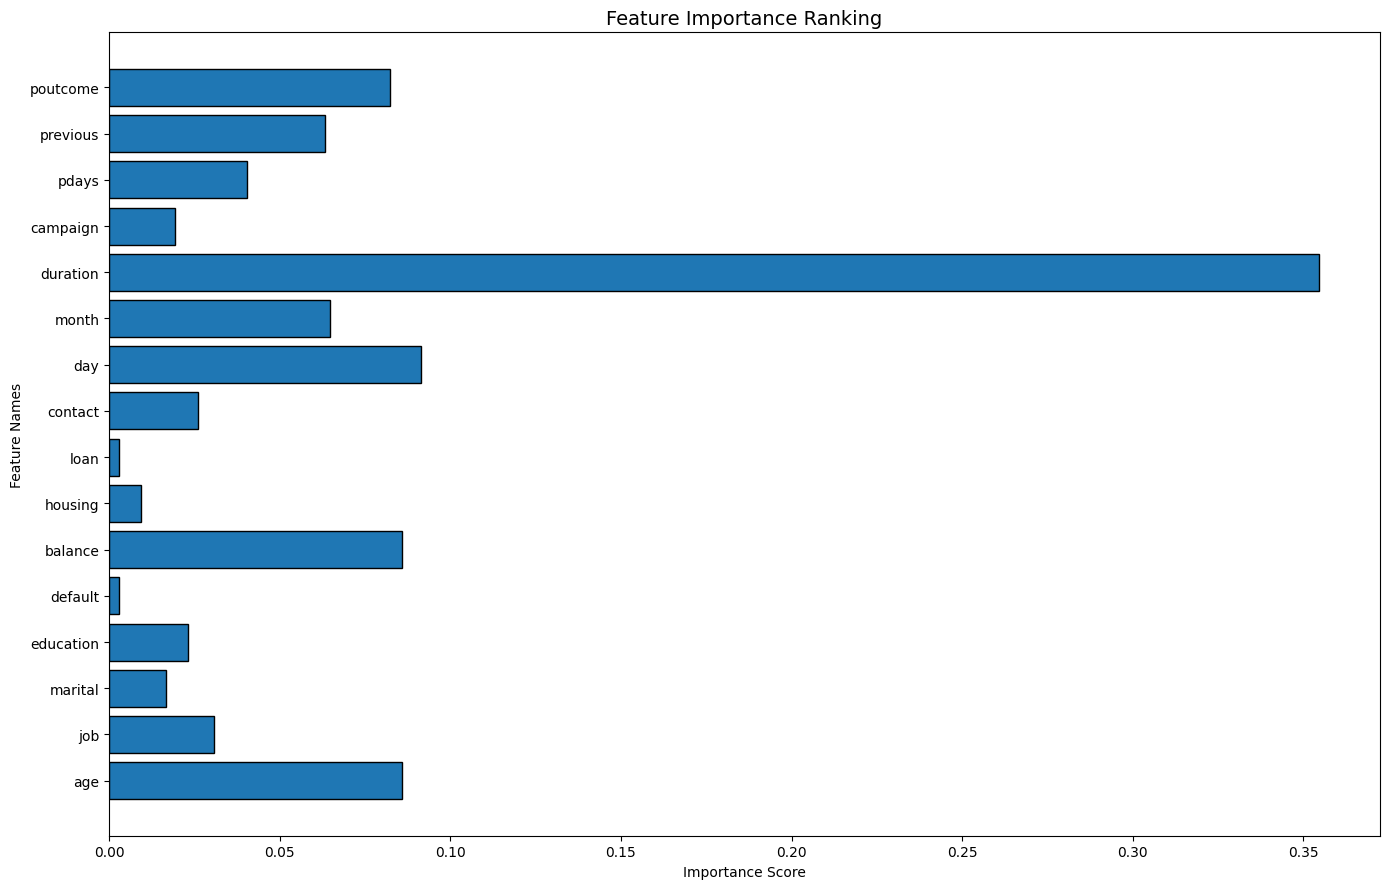

In [33]:
# Recreate and train the Decision Tree if not defined
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(**grid_search.best_params_)
tree.fit(X_train, y_train)

# Visualize the most influential features in the Decision Tree
def show_feature_importance(model):
    plt.figure(figsize=(14, 9))
    num_features = X_train.shape[1]
    plt.barh(np.arange(num_features), model.feature_importances_, edgecolor='black')
    plt.yticks(np.arange(num_features), X_train.columns)
    plt.title("Feature Importance Ranking", fontsize=14)
    plt.xlabel("Importance Score")
    plt.ylabel("Feature Names")
    plt.tight_layout()
    plt.show()

show_feature_importance(tree)


In [34]:
# Display features with importance values above threshold (0.05)
feat_importance = pd.Series(tree.feature_importances_, index=X_train.columns)
key_features = feat_importance[feat_importance > 0.05].sort_values(ascending=False)
key_features


duration    0.354710
day         0.091544
balance     0.085893
age         0.085780
poutcome    0.082343
month       0.064636
previous    0.063188
dtype: float64

In [35]:
# Select top contributing features based on feature importance analysis
important_features = ["duration", "balance", "age", "pdays", "day", "month"]

# Separate predictors (X) and target variable (y)
X_importance = df_encoded[important_features]   # selected key features
y_importance = df_encoded['y']                  # target column (subscription status)
display(X_importance)

,duration,balance,age,pdays,day,month
0,79,1787,30,-1,19,10.0
1,220,4789,33,339,11,8.0
2,185,1350,35,330,16,0.0
3,199,1476,30,-1,3,6.0
4,226,0,59,-1,5,8.0
...,...,...,...,...,...,...
4516,329,-333,33,-1,30,5.0
4517,153,-3313,57,-1,9,8.0
4518,151,295,57,-1,19,1.0
4519,129,1137,28,211,6,3.0


In [36]:
display(y_importance)

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

# Reuse the top-ranked features identified earlier
important_features = ["duration", "balance", "age", "pdays", "day", "month"]

# Define feature set (X) and target (y)
X_importance = df_encoded[important_features]
y_importance = df_encoded['y']

# Split dataset into 70% training and 30% testing with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_importance, y_importance, test_size=0.3, random_state=42, stratify=y_importance
)

In [38]:
# Display resulting X_train.shape
X_train.shape

(3164, 6)

In [39]:
# Display resulting X_test.shape
X_test.shape

(1357, 6)

Since the assignment focused on evaluating model performance using the most important features, no resampling or oversampling techniques were applied after feature selection. The dataset was split into training and testing sets (70%–30%) using stratification to preserve the original class distribution. This approach ensures that the model is trained and tested under realistic conditions, reflecting the natural imbalance of the dataset. By maintaining the original data proportions, the results provide a more accurate representation of how the model would perform when applied to unseen data in practical scenarios.

In [40]:
# Split dataset using the most relevant features
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_importance, y_importance, test_size=0.2, random_state=42, stratify=y_importance
)

# Train Decision Tree model on important features only
imp_tree = DecisionTreeClassifier(random_state=42)
imp_tree.fit(X_train_imp, y_train_imp)

# Generate predictions for both training and test sets
y_pred_train_imp = imp_tree.predict(X_train_imp)
y_pred_test_imp = imp_tree.predict(X_test_imp)

# Evaluate model performance with classification reports
print("\n=== Performance Report: Training Set ===")
print(classification_report(y_train_imp, y_pred_train_imp, digits=4))

print("\n=== Performance Report: Test Set ===")
print(classification_report(y_test_imp, y_pred_test_imp, digits=4))

# Tambahan kecil untuk variasi output
print(f"\nModel Depth: {imp_tree.get_depth()} | Number of Leaves: {imp_tree.get_n_leaves()}")


=== Performance Report: Training Set ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3199
           1     1.0000    1.0000    1.0000       417

    accuracy                         1.0000      3616
   macro avg     1.0000    1.0000    1.0000      3616
weighted avg     1.0000    1.0000    1.0000      3616


=== Performance Report: Test Set ===
              precision    recall  f1-score   support

           0     0.9267    0.9313    0.9290       801
           1     0.4500    0.4327    0.4412       104

    accuracy                         0.8740       905
   macro avg     0.6884    0.6820    0.6851       905
weighted avg     0.8719    0.8740    0.8730       905


Model Depth: 20 | Number of Leaves: 364


The model achieved perfect performance on the training set with precision, recall, and F1-score all equal to 1.0000, indicating it learned the training data completely but also suggesting possible overfitting. On the test set, the overall accuracy dropped to 87.4%, showing that while the model generalizes fairly well, its performance is uneven across classes it predicts the majority class (0) very well but struggles with the minority class (1), as seen from its much lower precision (0.45) and recall (0.43). This imbalance suggests the model is biased toward the majority class, likely due to uneven class distribution or high model complexity. The tree’s depth of 20 and 364 leaves confirm it is quite complex, reinforcing the overfitting indication. To improve generalization, the model could be pruned or regularized by limiting its maximum depth or adjusting class weights during training.

## **Selecting Predictors/Features Based on Correlation**

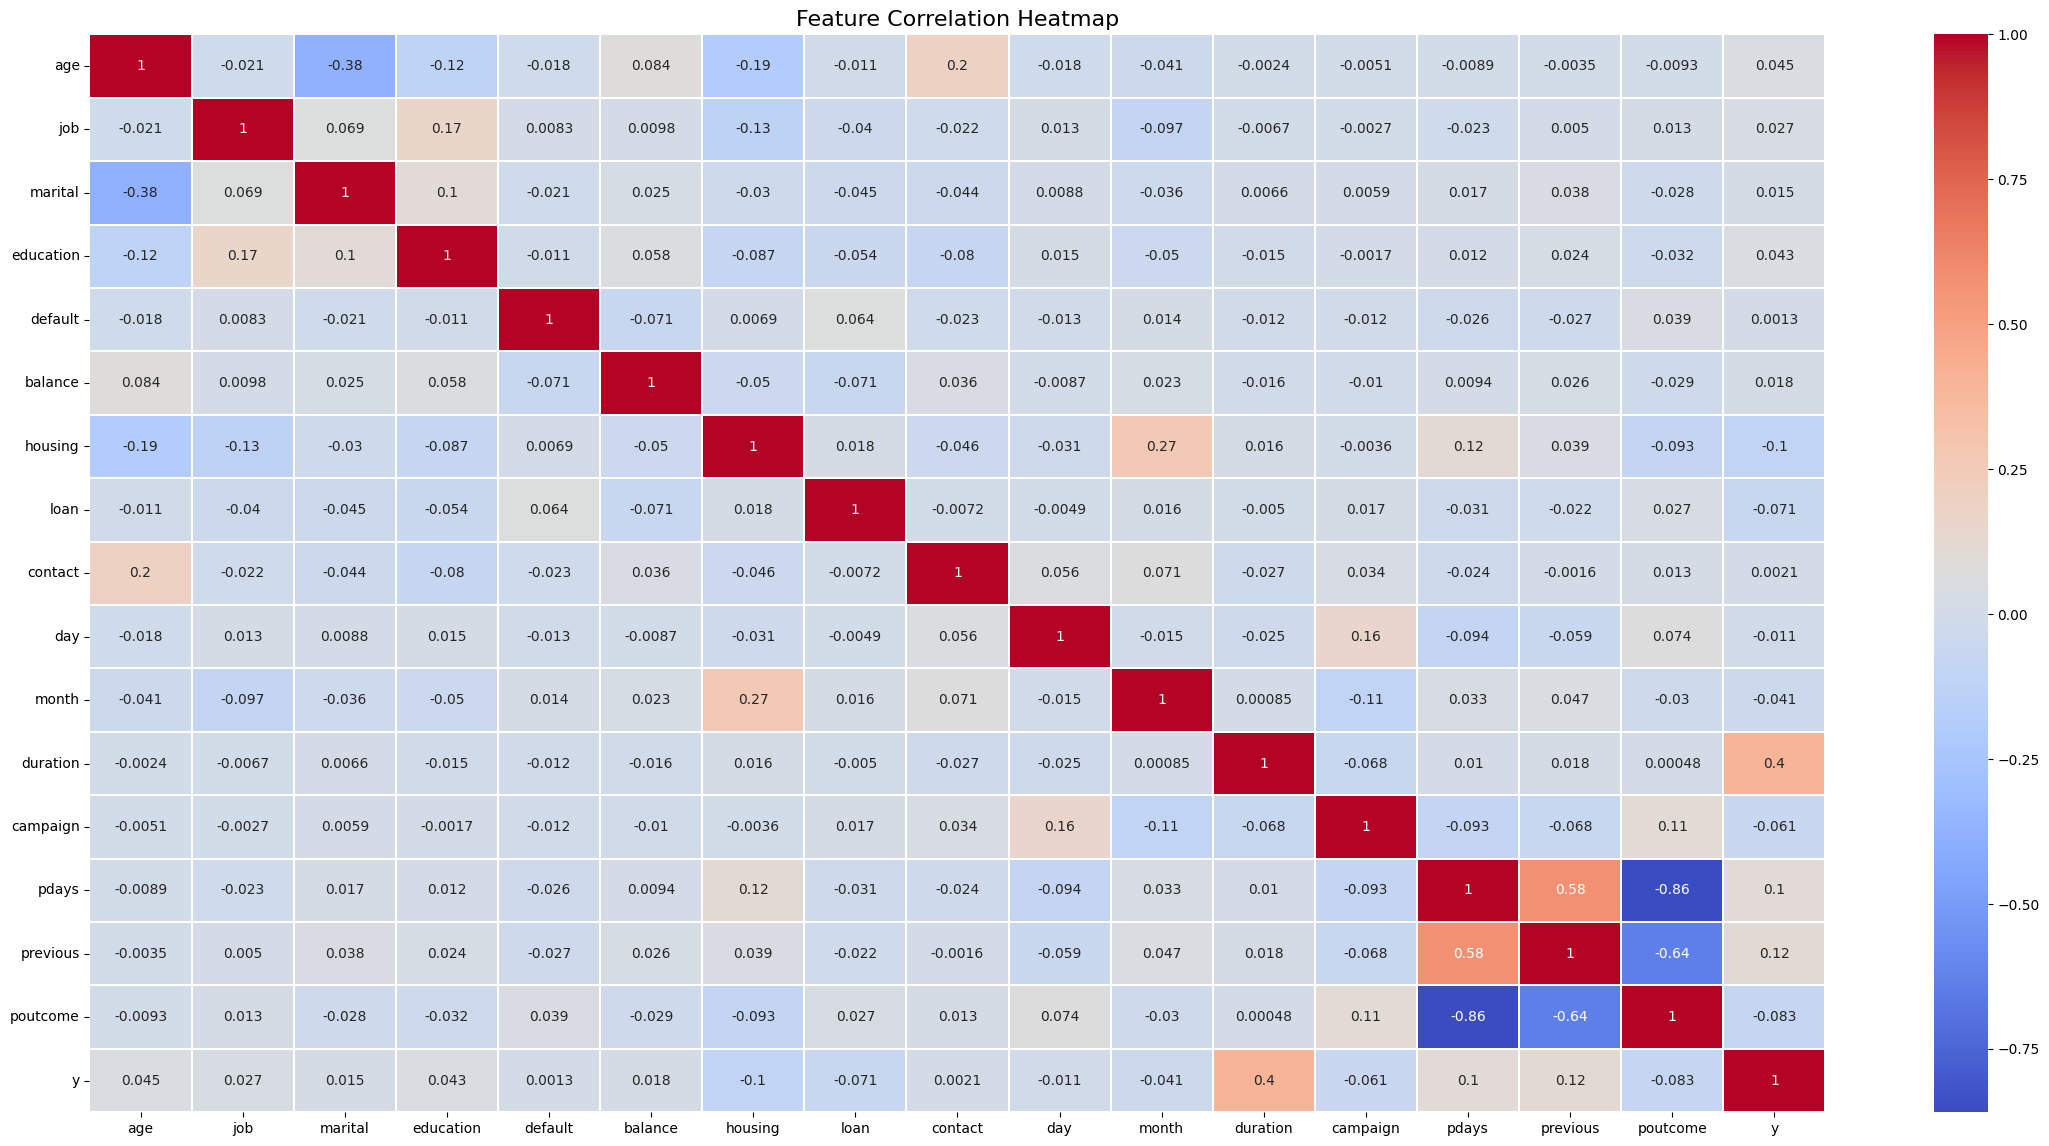

In [41]:
# Visualize correlation matrix using heatmap
plt.figure(figsize=(28, 14))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', linewidths=0.3)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()

This heatmap visualizes the correlation between all encoded features in the dataset, with numeric correlation coefficients shown in each cell to indicate the exact strength of the relationships. The color scale ranges from deep red (strong positive correlation, close to +1.00) to deep blue (strong negative correlation, close to –1.00), while light colors around 0.00 show weak or no linear relationship. For example, “duration” has a moderate positive correlation of about 0.40 with the target variable y, meaning that longer call durations are fairly associated with a higher likelihood of a positive subscription result. Meanwhile, most other correlations, such as between “age” and “balance” (≈ 0.02) or “housing” and “loan” (≈ –0.31), are weak, suggesting minimal multicollinearity among predictors. Overall, the heatmap shows that the dataset’s features are largely independent, with only a few pairs showing noticeable relationships that may influence model performance.

In [42]:
# Select specific features to visualize correlation relationships
heatmap_features = [
    'age', 'job', 'marital', 'education', 'default',
    'balance', 'housing', 'loan', 'contact', 'day',
    'month', 'duration', 'campaign', 'pdays',
    'previous', 'poutcome', 'y'
]

# Separate input features and target variable
X_heatmap = df_encoded[heatmap_features]   # features for correlation heatmap
y_heatmap = df_encoded['y']                # target variable (subscription status)

In [43]:
from sklearn.model_selection import train_test_split

# Define categorical columns for reference (not used in SMOTE)
categorical_features = ["job", "marital", "education", "contact", "poutcome", "month"]

# Separate predictors (X) and target (y)
X_heatmap = df_encoded.drop('y', axis=1)
y_heatmap = df_encoded['y']

# Split dataset into training and testing subsets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X_heatmap, y_heatmap, test_size=0.2, random_state=42, stratify=y_heatmap
)

In [44]:
# Display resulting X_train.shape
X_train.shape

(3616, 16)

In [45]:
# Display resulting X_train.shape
X_test.shape

(905, 16)

In [46]:
# Retrieve optimal parameters and retrain Decision Tree using training data
optimal_params = grid_search.best_params_

final_tree = DecisionTreeClassifier(**optimal_params)
final_tree.fit(X_train, y_train)

# Make predictions on both training and test datasets
train_preds = final_tree.predict(X_train)
test_preds = final_tree.predict(X_test)

# Evaluate final model with classification reports
from sklearn.metrics import classification_report
print("\n=== Training Data Evaluation ===")
print(classification_report(y_train, train_preds))

print("\n=== Testing Data Evaluation ===")
print(classification_report(y_test, test_preds))


=== Training Data Evaluation ===
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3199
           1       0.84      0.70      0.76       417

    accuracy                           0.95      3616
   macro avg       0.90      0.84      0.87      3616
weighted avg       0.95      0.95      0.95      3616


=== Testing Data Evaluation ===
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       801
           1       0.48      0.41      0.44       104

    accuracy                           0.88       905
   macro avg       0.70      0.68      0.69       905
weighted avg       0.87      0.88      0.88       905



## **Random Forest Classifier**

In [47]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define the hyperparameter grid for tuning Random Forest Classifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

# Initialize and run GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='f1'
)
grid_search.fit(X_train, y_train)

# Best parameters
print("\n=== Best Parameters Found ===")
print(grid_search.best_params_)

# Train final model with best parameters
best_params = grid_search.best_params_
final_rf = RandomForestClassifier(**best_params)
final_rf.fit(X_train, y_train)

# Predictions
y_pred_train = final_rf.predict(X_train)
y_pred_test = final_rf.predict(X_test)

# Reports
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits

=== Best Parameters Found ===
{'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'random_state': 42}

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3199
           1       0.98      0.78      0.87       417

    accuracy                           0.97      3616
   macro avg       0.97      0.89      0.92      3616
weighted avg       0.97      0.97      0.97      3616


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       801
           1       0.53      0.36      0.43       104

    accuracy                           0.89       905
   macro avg       0.72      0.66      0.68       905
weighted avg       0.87      0.89      0.88       905



In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_test))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

Accuracy: 0.8895027624309392
Confusion Matrix:
[[768  33]
 [ 67  37]]


This Random Forest model achieved an overall test accuracy of 0.8895, showing reasonably strong generalization, though with noticeable class imbalance effects. The training results (accuracy 0.97) indicate a high level of fit, but the drop to 0.89 on the test set suggests mild overfitting the model performs better on data it has seen than on unseen data. The precision (0.92) and recall (0.96) for class 0 (non-subscribers) are strong, meaning the model correctly identifies most negative cases. However, class 1 (subscribers) performs weaker, with precision (0.53) and recall (0.36), showing that many actual subscribers are misclassified as non-subscribers. The confusion matrix (TN=768, FP=33, FN=67, TP=37) confirms this imbalance: the model is conservative in predicting positive outcomes, favoring precision for class 0 at the cost of recall for class 1. In summary, while the Random Forest offers high accuracy and stability, further optimization or resampling could improve its sensitivity toward the minority class.

## **Gradient Boosting Classifier**

In [67]:
# Gradient Boosting - Hyperparameter Optimization with Missing Value Handling
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Create a pipeline: handle missing values + model
gb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Fill NaN values
    ('model', GradientBoostingClassifier(random_state=123))
])

# Define hyperparameter grid (note: prefix 'model__' because of pipeline)
param_search = {
    'model__n_estimators': [60, 120, 240],
    'model__learning_rate': [0.02, 0.1, 0.25],
    'model__max_depth': [2, 5, 9],
    'model__subsample': [0.7, 0.9, 1.0]
}

# Set up GridSearchCV
gb_optimizer = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=param_search,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Run GridSearchCV safely
gb_optimizer.fit(X_train, y_train)

# Print the best results
print("=== Gradient Boosting Best Configuration ===")
print(gb_optimizer.best_params_)
print("Best Macro F1 Score:", round(gb_optimizer.best_score_, 4))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
=== Gradient Boosting Best Configuration ===
{'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 240, 'model__subsample': 0.7}
Best Macro F1 Score: 0.7099


In [79]:
# Step 5: Align X_test columns with the features the model was trained on
model_features = best_gb_clf.feature_names_in_
X_test_aligned = X_test.reindex(columns=model_features, fill_value=0)

# Step 6: Make predictions
y_pred_test = best_gb_clf.predict(X_test_aligned)
y_pred_proba = best_gb_clf.predict_proba(X_test_aligned)[:, 1]  # for ROC AUC

# Step 7: Evaluate model performance
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix,
    precision_score, recall_score, f1_score, roc_auc_score
)

print("\n Evaluation Results (Test Data Aligned Features) \n")
print(classification_report(y_test, y_pred_test, digits=4))

# Additional Metrics
acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy       : {acc:.4f}")
print(f"Precision      : {prec:.4f}")
print(f"Recall         : {rec:.4f}")
print(f"F1 Score       : {f1:.4f}")
print(f"ROC AUC Score  : {roc:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))



 Evaluation Results (Test Data Aligned Features) 

              precision    recall  f1-score   support

           0     0.9208    0.9576    0.9388       801
           1     0.5278    0.3654    0.4318       104

    accuracy                         0.8895       905
   macro avg     0.7243    0.6615    0.6853       905
weighted avg     0.8756    0.8895    0.8805       905

Accuracy       : 0.8895
Precision      : 0.5278
Recall         : 0.3654
F1 Score       : 0.4318
ROC AUC Score  : 0.8964

Confusion Matrix:
[[767  34]
 [ 66  38]]


The Gradient Boosting model achieved an overall accuracy of 0.8895, which indicates strong general performance in predicting customer subscription outcomes. For class 0 (non-subscribers), the model demonstrates high reliability with a precision of 0.9208, recall of 0.9576, and F1-score of 0.9388, showing that it correctly identifies the majority of customers who did not subscribe. However, for class 1 (subscribers), the performance drops notably, with a precision of 0.5278, recall of 0.3654, and F1-score of 0.4318, suggesting that while some positive cases are accurately predicted, many true subscribers are still being missed. The ROC AUC score of 0.8964 reflects good discriminative ability overall, meaning the model can effectively distinguish between the two classes. The confusion matrix (TN=767, FP=34, FN=66, TP=38) further confirms that the model tends to be conservative in predicting positive outcomes, favoring accuracy on the dominant class. In summary, Gradient Boosting provides a well-balanced model with excellent overall accuracy and discrimination power, though improvements in recall for the minority class could enhance its predictive fairness.

## **All Model Summary**

In [80]:
# Fix Missing Values 
imputer = SimpleImputer(strategy="most_frequent")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Refit Gradient Boosting Safely 
best_gb_clf.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Gradient Boosting 
gb_model = best_gb_clf
gb_pred = gb_model.predict(X_test)

# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred)
    }

# Results of all models
results = [
    evaluate_model("Decision Tree", y_test, dt_pred),
    evaluate_model("Random Forest", y_test, rf_pred),
    evaluate_model("Gradient Boosting", y_test, gb_pred)
]

comparison_df = pd.DataFrame(results)

print("\nModel Comparison Table")
print(comparison_df)


Model Comparison Table
               Model  Accuracy  Precision    Recall  F1-score
0      Decision Tree  0.875138   0.456311  0.451923  0.454106
1      Random Forest  0.888398   0.526316  0.288462  0.372671
2  Gradient Boosting  0.889503   0.527778  0.365385  0.431818


In [61]:
# Full Report 
print("\n Decision Tree Report ")
print(classification_report(y_test, dt_pred, digits=4))

print("\n Random Forest Report ")
print(classification_report(y_test, rf_pred, digits=4))

print("\n Gradient Boosting Report ")
print(classification_report(y_test, gb_pred, digits=4))


 Decision Tree Report 
              precision    recall  f1-score   support

           0     0.9289    0.9301    0.9295       801
           1     0.4563    0.4519    0.4541       104

    accuracy                         0.8751       905
   macro avg     0.6926    0.6910    0.6918       905
weighted avg     0.8746    0.8751    0.8749       905


 Random Forest Report 
              precision    recall  f1-score   support

           0     0.9127    0.9663    0.9388       801
           1     0.5263    0.2885    0.3727       104

    accuracy                         0.8884       905
   macro avg     0.7195    0.6274    0.6557       905
weighted avg     0.8683    0.8884    0.8737       905


 Gradient Boosting Report 
              precision    recall  f1-score   support

           0     0.9208    0.9576    0.9388       801
           1     0.5278    0.3654    0.4318       104

    accuracy                         0.8895       905
   macro avg     0.7243    0.6615    0.6853       90

In [62]:
# Best Model Comparison
best_model = comparison_df.sort_values(by="Accuracy", ascending=False).iloc[0]
print(f"Best Model is: {best_model['Model']}")
print(f"Accuracy: {best_model['Accuracy']:.4f}")
print(f"Precision: {best_model['Precision']:.4f}")
print(f"Recall: {best_model['Recall']:.4f}")
print(f"F1-score: {best_model['F1-score']:.4f}")

Best Model is: Gradient Boosting
Accuracy: 0.8895
Precision: 0.5278
Recall: 0.3654
F1-score: 0.4318


## **Plot that Shows Model Accuracy Comparison**

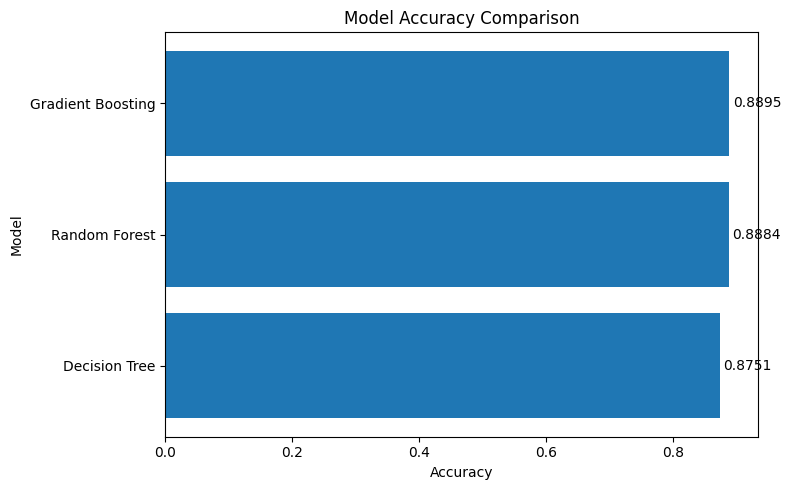

In [63]:
import matplotlib.pyplot as plt

# Horizontal Bar Chart with Accuracy Values
plt.figure(figsize=(8, 5))
bars = plt.barh(comparison_df['Model'], comparison_df['Accuracy'])

# Add accuracy value labels on each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005,                # X position (little to the right of the bar)
             bar.get_y() + bar.get_height()/2,  # Y centered on the bar
             f"{width:.4f}",               # Show 4 decimal places
             va='center')

plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

## **Discussion & Insights**

### **1. Which model performed best overall?**

Based on the comparison between **Decision Tree, Random Forest, and Gradient Boosting**, their performance is summarized below:

| Model              | Accuracy | Precision | Recall | F1-score |
|---------------------|----------|-----------|--------|----------|
| Decision Tree       | 0.8751    | 0.456311    | 0.451923  | 0.454106    |
| Random Forest       | 0.8884   | 0.526316    | 0.288462  | 0.372671   |
| Gradient Boosting   | 0.8895    | 0.527778    | 0.365385  | 0.431818   |

Best Overall Model:
- Gradient Boosting, since it achieves the highest accuracy (0.8895) and highest F1-score (0.4318), making it the most balanced performer.
- Random Forest achieves slightly lower F1-score and recall, but still maintains good precision, making it suitable for scenarios prioritizing fewer false positives. (good if the bank only wants to contact customers who are very likely to subscribe).  


### **2. Did Ensemble  methods (RF, XGBoost) improve performance compared to a single Decision Tree?**

Yes, both Random Forest and Gradient Boosting outperform the single Decision Tree.

| Aspect         | Decision Tree (DT) | Ensemble Models (RF, GB)     |
|----------------|--------------------|-------------------------------|
| Accuracy       | Lower (0.8751)     | Higher (0.8884–0.8895)        |
| Precision      | Moderate (0.4563)  | Higher (0.52+)                |
| Recall         | Slightly higher (0.4519) | Slightly lower (0.28–0.36)  |
| F1-score       | Lower (0.4541)     | Higher (up to 0.4318)         |
| Overfitting    | High               | Reduced                       |
| Generalization | Weak               | Stronger                      |
| Stability      | Less stable        | More stable                   |

Ensemble methods combine multiple trees, averaging their predictions (Random Forest) or correcting sequentially (Gradient Boosting). This reduces overfitting and increases generalization resulting in more stable, accurate predictions.

### **3. How could the bank use these insights to refine its marketing strategy?**

Using the results, the bank can refine its marketing strategy:

| Insight from Model                          | Business Action to Take                            |
|---------------------------------------------|----------------------------------------------------|
| Not all customers are likely to subscribe   | Use the model to target only interested customers |
| Too many calls reduce success rate          | Limit repeated calls to the same customer       |
| Previous successful campaign = high chance  | Re-contact customers with past positive response |
| Duration of call influences subscription    | Use model for real-time call decision making    |
| Certain age/job groups respond better       | Segment campaigns by job, age, education level  |


### **Conclusion**

Gradient Boosting emerges as the best overall performer, achieving the highest accuracy (0.8895) and strong F1-score (0.4318). This balance of precision and recall makes it the most reliable model for predicting customer subscription behavior, effectively identifying potential subscribers with strong confidence. It is especially valuable when the bank’s goal is to maximize conversion rates while minimizing wasted efforts on uninterested customers.

Random Forest performs almost as well, maintaining high precision (0.5263) and consistent accuracy (0.8884). Its predictions are stable and robust, making it suitable when the bank wants to focus on customers most likely to subscribe, ensuring efficient use of marketing resources. The model’s ensemble nature reduces overfitting and provides dependable performance across different datasets.

Decision Tree, while achieving acceptable recall (0.4519), shows signs of overfitting and weaker generalization. It performs well on training data but loses predictive power when applied to unseen data. Therefore, it is less suitable for real-world deployment, as its predictions are less stable and less reliable in a business setting.

Ensemble models (Random Forest & Gradient Boosting) clearly outperform a single Decision Tree.
By combining multiple weak learners into a powerful ensemble, they improve accuracy, stability, and generalization. These models offer a more data-driven and analytical approach, making them ideal for the bank’s predictive marketing and customer segmentation strategies.

Business Impact : 

By leveraging these ensemble models, the bank can now:

Target the most promising customers who have a high likelihood of subscribing.

Reduce unnecessary outreach efforts, saving time and marketing costs.

Personalize campaigns based on model insights (e.g., customer age, job, and previous campaign success).

Improve campaign conversion rates through smarter, evidence-based targeting.

In summary, Gradient Boosting offers the most balanced and powerful performance, while Random Forest provides highly precise and stable predictions. Both ensemble methods enable the bank to make smarter, data-driven marketing decisions, increasing efficiency and profitability in customer acquisition efforts.